# importing  libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# loading dataset

In [2]:
df= pd.read_csv('iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# to display stats about data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info() #basic info  of data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
# to display no.of samples on each class

df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# preprocessing of dataset

In [13]:
#check for null values

df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:>

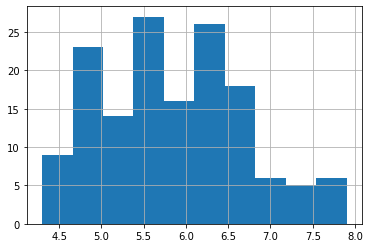

In [14]:
#histograms

df['sepal_length'].hist()


<AxesSubplot:>

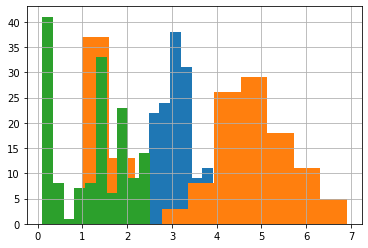

In [16]:
 df['sepal_width'].hist()
 df['petal_length'].hist()
 df['petal_width'].hist()


In [17]:
#scatterplot
colors= ['red', 'orange','blue']
species=['Iris-setosa','Iris-versicolor', 'Iris-virginica' ]

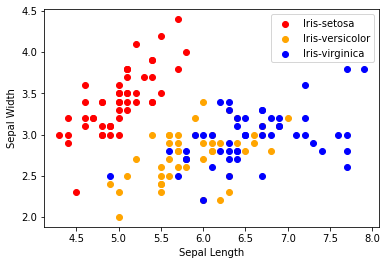

In [21]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

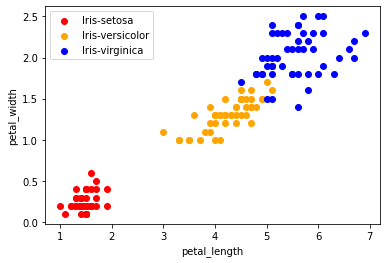

In [25]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c=colors[i], label=species[i])

plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()

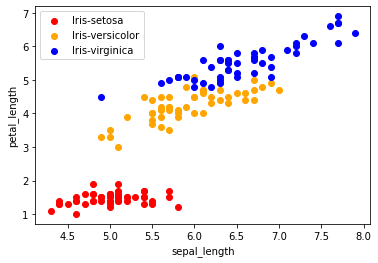

In [28]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c=colors[i], label=species[i])

plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend()

In [29]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x[sepal_width'], x['petal_width'], c=colors[i], label=species[i])

plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.legend()

SyntaxError: invalid syntax (1816105216.py, line 3)

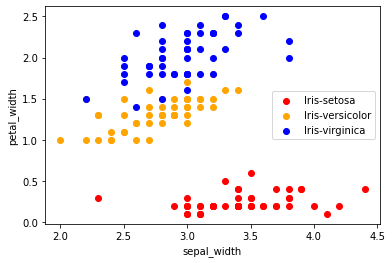

In [30]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c=colors[i], label=species[i])

plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.legend()
plt.show()


# coorelation matrix

a correlation matrix is a table  showing correlation coefficents betwenn variables. Each cell in the table shows the correlation between variables. The value is the range of -1 to 1. If two variables have high correlation , we can negect one variable from those two.

In [31]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

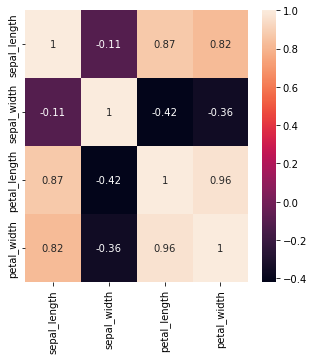

In [34]:
corr= df.corr()
fig, ax= plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot= True, ax=ax)

<AxesSubplot:>

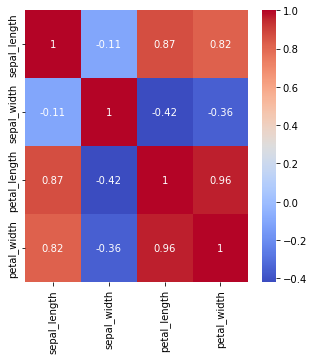

In [35]:
corr= df.corr()
fig, ax= plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot= True, ax=ax, cmap='coolwarm') #if you want to differnt colurs

# label encoder
in machine learning, we usually deal with datasets which contains multiple lables in one or more than one columns, rhese lables can be in the form of words or numbers, lables encoding refers to converting he labels into numeric form o as to convert in into the machines_ readable from

In [36]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()


In [38]:
df['species']= le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# model training

In [115]:
from sklearn.model_selection import train_test_split

# Specify the test_size as 0.30 to split 70% for training and 30% for testing
x = df.drop(columns=['species'])
y = df['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)


In [116]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [117]:
model.fit(x_train, y_train) #model training

C:\Users\adity\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [118]:
print("Accuracy: {:.2f}%".format(model.score(x_test, y_test) * 100))
#print metrix to gt performance

Accuracy: 97.78%


In [119]:
from sklearn.neighbors import KNeighborsClassifier

# Create a K-Nearest Neighbors model
model = KNeighborsClassifier()


In [124]:
print("Accuracy: {:.2f}%".format(model.score(x_test, y_test) * 100))


Accuracy: 95.56%


In [121]:
#decsion tree
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()

In [122]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [123]:
print("Accuracy: {:.2f}%".format(model.score(x_test, y_test) * 100))
#print metrix to gt performance

Accuracy: 95.56%
